In [1]:
#!/usr/bin/env python
import os
import pandas as pd
import matplotlib as plt
from collections import defaultdict

file_path = "experiment1/output.out"

df = pd.read_csv(file_path, sep="\t", header=0)
df = df.sort_values(by="id")
average_value = df["waitingTime"].mean()
print(average_value)

df
# open all csv of schduler and get total average turnaround time of each scheduler, plot a chart, compare which one perform good

130.0


,id,priority,createdTime,startedTime,terminatedTime,cpuTime,blockedTime,turnaroundTime,waitingTime,responseTime
5,0,0,0,0,203,7,0,203,196,0
4,1,0,0,0,203,58,43,203,145,0
1,2,0,0,4,133,20,63,129,109,4
2,3,0,0,8,165,34,51,157,123,8
3,4,0,0,12,195,56,28,183,127,12
0,5,0,0,16,124,28,25,108,80,16


In [2]:
schedulers = ["FCFS", "RR"]
num_of_test_case = int(os.environ.get("TEST_CASES"))
total_average_WT = defaultdict(list)
total_average_RT = defaultdict(list)

for scheduler in schedulers:
    for i in range(1, num_of_test_case):
        file_path = f"experiment1/scheduler/{scheduler}/output/output{i}.out"
        df = pd.read_csv(file_path, sep="\t", header=0)
        average_WT = round(df["waitingTime"].mean())
        average_RT = round(df["responseTime"].mean())
        total_average_WT[scheduler].append(average_WT)
        total_average_RT[scheduler].append(average_RT)

print(total_average_WT)


defaultdict(<class 'list'>, {'FCFS': [26, 43, 82, 133, 87, 26, 51, 58, 85, 59, 137, 74, 158, 88], 'RR': [36, 42, 88, 173, 91, 26, 56, 62, 92, 76, 169, 95, 149, 83]})


<AxesSubplot:>

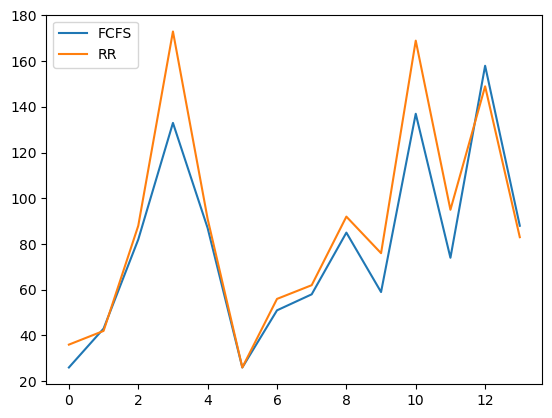

In [3]:
df = pd.DataFrame.from_dict(total_average_WT)
df.plot()

<AxesSubplot:>

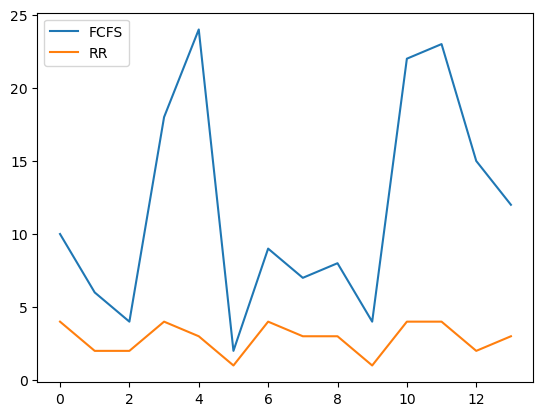

In [4]:
df = pd.DataFrame.from_dict(total_average_RT)
df.plot()